<a href="https://colab.research.google.com/github/GGMmattos/Machine-Learning-And-Data-Science/blob/main/Na%C3%AFve_bayes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Naïve bayes 

In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
import pandas as pd

In [77]:
base_risco_credito = pd.read_csv('risco_credito.csv') #importação dos dados 
base_risco_credito 

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [78]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values 
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [79]:
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [80]:
from sklearn.preprocessing import LabelEncoder #Instanciando os objetos da classe
label_encoder_historia  = LabelEncoder()
label_encoder_divida  = LabelEncoder()
label_encoder_garantia  = LabelEncoder()
label_encoder_renda  = LabelEncoder()

In [81]:
X_risco_credito[:,0] = label_encoder_historia.fit_transform(X_risco_credito[:,0])
X_risco_credito[:,1] = label_encoder_divida.fit_transform(X_risco_credito[:,1])
X_risco_credito[:,2] = label_encoder_garantia.fit_transform(X_risco_credito[:,2])
X_risco_credito[:,3] = label_encoder_renda.fit_transform(X_risco_credito[:,3])

In [82]:
X_risco_credito #Agora só temos atributos numéricos

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [83]:
import pickle
with open('risco_credito.pkl','wb') as f:
  pickle.dump([X_risco_credito, y_risco_credito], f)

In [84]:
naive_risco_credito = GaussianNB()
naive_risco_credito.fit(X_risco_credito, y_risco_credito) #Treinamento, primeiro parametro sao os atributos previsores e o segundo as classes(resposta esperada)

GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
#história boa(0), dívida alta(0), garantia nenhuma(1), renda > 35(2)     #dados para teste
#história ruim(2), dívida alta(0), garantia adequada(0), renda < 15 (0)

In [86]:
previsao = naive_risco_credito.predict([[0,0,1,2],[2,0,0,0]]) #teste do algoritmo ja treinado
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [87]:
naive_risco_credito.classes_ #saidas possíveis

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [88]:
naive_risco_credito.class_count_

array([6., 5., 3.])

In [89]:
naive_risco_credito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

#Base credit data

In [90]:
import pickle
with open('credit.pkl', mode='rb') as f:
  X_credit_treinamento, y_credit_treinamemto, X_credit_teste, y_credit_teste = pickle.load(f)

In [91]:
X_credit_treinamento.shape, y_credit_treinamemto.shape #X Contem o atributos previsores, Y contem as classes

((1500, 3), (1500,))

In [92]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [93]:
naive_credit_data = GaussianNB() #Treinamento do algoritmo
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamemto)

GaussianNB(priors=None, var_smoothing=1e-09)

In [94]:
previsoes  = naive_credit_data.predict(X_credit_teste) #precisão com dados que não foram utilizados no treinamento do algoritmo 
previsoes #contem as respostas do algoritmo 


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [95]:
y_credit_teste #respostas corretas 

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report #comparação entre os resultados 
accuracy_score(y_credit_teste, previsoes) #retorna a porcentagem dos acertos 

0.938

Ótimo resultado de acertos, 93%

In [97]:
confusion_matrix(y_credit_teste, previsoes)

array([[428,   8],
       [ 23,  41]])

In [98]:
from yellowbrick.classifier import ConfusionMatrix

0.938

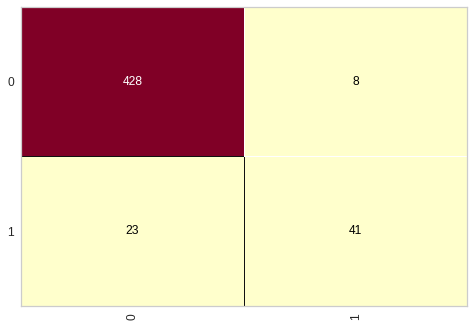

In [99]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamemto)
cm.score(X_credit_teste, y_credit_teste)

In [100]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



#Base Census

In [101]:
with open('census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [102]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [103]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [104]:
naive_census = GaussianNB() 
naive_census.fit(X_census_treinamento, y_census_treinamento)  #realização do treinamentos 
previsoes = naive_census.predict(X_census_teste) #realizammos o teste com o algoritmo ja treinado 
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [105]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [106]:
accuracy_score(y_census_teste, previsoes)  #taxa de acerto 


0.4767656090071648

Resultado ruim, taxa de acerto igual a 47%

0.4767656090071648

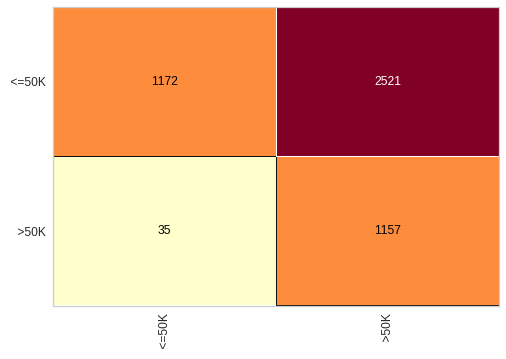

In [107]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [108]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

